In [1]:
import pandas as pd

In [2]:
target_df = pd.read_csv('./deribit_split/BTC-9MAY25-92000-P.csv')

In [4]:
target_df

instrument_name           expiration   strike option_type   price  \
0    BTC-9MAY25-92000-P  2025-05-09 08:00:00  92000.0         put  0.0055   
1    BTC-9MAY25-92000-P  2025-05-09 08:00:00  92000.0         put  0.0055   
2    BTC-9MAY25-92000-P  2025-05-09 08:00:00  92000.0         put  0.0055   
3    BTC-9MAY25-92000-P  2025-05-09 08:00:00  92000.0         put  0.0055   
4    BTC-9MAY25-92000-P  2025-05-09 08:00:00  92000.0         put  0.0055   
..                  ...                  ...      ...         ...     ...   
106  BTC-9MAY25-92000-P  2025-05-09 08:00:00  92000.0         put  0.0015   
107  BTC-9MAY25-92000-P  2025-05-09 08:00:00  92000.0         put  0.0014   
108  BTC-9MAY25-92000-P  2025-05-09 08:00:00  92000.0         put  0.0016   
109  BTC-9MAY25-92000-P  2025-05-09 08:00:00  92000.0         put  0.0016   
110  BTC-9MAY25-92000-P  2025-05-09 08:00:00  92000.0         put  0.0015   

     amount direction                timestamp  
0       9.0       buy  2025-05-06 02:10:59.021  
1       0.8       buy  2025-05-06 02:10:59.021  
2       0.3      sell  2025-05-06 02:34:01.707  
3       1.0      sell  2025-05-06 02:34:17.574  
4       0.2      sell  2025-05-06 02:35:29.453  
..      ...       ...                      ...  
106     0.1      sell  2025-05-07 00:22:15.910  
107     0.1       buy  2025-05-07 01:32:45.873  
108     0.1       buy  2025-05-07 01:46:25.129  
109     0.4       buy  2025-05-07 01:46:25.129  
110     0.5       buy  2025-05-07 01:46:38.745  

[111 rows x 8 columns]

In [7]:
import os
import pandas as pd
from datetime import timedelta
from binance.client import Client

def attach_binance_spot_prices(target_df):
    """
    target_df: ÏòµÏÖò Ï≤¥Í≤∞ Îç∞Ïù¥ÌÑ∞ (timestamp Ïª¨Îüº Ìè¨Ìï®)
    return: spot priceÍ∞Ä Îß§ÌïëÎêú info_df
    """
    # Step 1: Î∞îÏù¥ÎÇ∏Ïä§ API Ïó∞Îèô
    api_key = "zKyYTZWpQC9FfWlaWvbTLkeNENIPt8bBFIwJsMvl2x7pdeC5DI7YEQv9JzJpEEcW"
    api_secret = "lLCEiIcWuip8k529JgBAWXMZXHVHmABTIfRK62oPFjslRhuZcfNmx2IrqwEC0VMH"
    client = Client(api_key, api_secret)

    # Step 2: ÌïÑÏöîÌïú ÏãúÍ∞Ñ Î≤îÏúÑ Ï∂îÏ∂ú
    start_time = target_df['timestamp'].min() - timedelta(minutes=5)
    end_time = target_df['timestamp'].max() + timedelta(minutes=5)

    # Step 3: Î∞îÏù¥ÎÇ∏Ïä§ÏóêÏÑú 1Î∂ÑÎ¥â BTCUSDT Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
    klines = client.get_historical_klines("BTCUSDT", interval=Client.KLINE_INTERVAL_1MINUTE,
                                          start_str=start_time.strftime("%Y-%m-%d %H:%M:%S"),
                                          end_str=end_time.strftime("%Y-%m-%d %H:%M:%S"))

    spot_df = pd.DataFrame(klines, columns=[
        "timestamp", "open", "high", "low", "close", "volume", "close_time",
        "quote_asset_volume", "number_of_trades", "taker_buy_base",
        "taker_buy_quote", "ignore"
    ])

    spot_df['timestamp'] = pd.to_datetime(spot_df['timestamp'], unit='ms')
    spot_df['spot_price'] = spot_df['close'].astype(float)
    spot_df = spot_df[['timestamp', 'spot_price']]

    # Step 4: Í∞ÄÏû• Í∞ÄÍπåÏö¥ Ïù¥Ï†Ñ ÏãúÏ†êÏùò spot_priceÎ•º Îß§Ìïë
    merged_df = pd.merge_asof(
        target_df.sort_values('timestamp'),
        spot_df.sort_values('timestamp'),
        on='timestamp',
        direction='backward'
    )

    return merged_df

In [8]:
final_df = attach_binance_spot_prices(target_df)

In [9]:
final_df

instrument_name          expiration   strike option_type   price  \
0    BTC-9MAY25-92000-P 2025-05-09 08:00:00  92000.0         put  0.0055   
1    BTC-9MAY25-92000-P 2025-05-09 08:00:00  92000.0         put  0.0055   
2    BTC-9MAY25-92000-P 2025-05-09 08:00:00  92000.0         put  0.0055   
3    BTC-9MAY25-92000-P 2025-05-09 08:00:00  92000.0         put  0.0055   
4    BTC-9MAY25-92000-P 2025-05-09 08:00:00  92000.0         put  0.0055   
..                  ...                 ...      ...         ...     ...   
106  BTC-9MAY25-92000-P 2025-05-09 08:00:00  92000.0         put  0.0015   
107  BTC-9MAY25-92000-P 2025-05-09 08:00:00  92000.0         put  0.0014   
108  BTC-9MAY25-92000-P 2025-05-09 08:00:00  92000.0         put  0.0016   
109  BTC-9MAY25-92000-P 2025-05-09 08:00:00  92000.0         put  0.0016   
110  BTC-9MAY25-92000-P 2025-05-09 08:00:00  92000.0         put  0.0015   

     amount direction               timestamp  spot_price  
0       9.0       buy 2025-05-06 02:10:59.021    94239.76  
1       0.8       buy 2025-05-06 02:10:59.021    94239.76  
2       0.3      sell 2025-05-06 02:34:01.707    94173.93  
3       1.0      sell 2025-05-06 02:34:17.574    94173.93  
4       0.2      sell 2025-05-06 02:35:29.453    94177.49  
..      ...       ...                     ...         ...  
106     0.1      sell 2025-05-07 00:22:15.910    97461.20  
107     0.1       buy 2025-05-07 01:32:45.873    97505.17  
108     0.1       buy 2025-05-07 01:46:25.129    97304.00  
109     0.4       buy 2025-05-07 01:46:25.129    97304.00  
110     0.5       buy 2025-05-07 01:46:38.745    97304.00  

[111 rows x 9 columns]

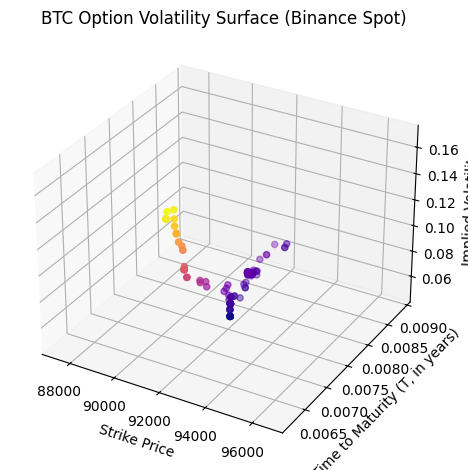

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Ïã§Ï†ú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥†, ÏãúÍ∞ÅÌôîÏö©ÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = final_df.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['expiration'] = pd.to_datetime(df['expiration'])
df['T'] = (df['expiration'] - df['timestamp']).dt.total_seconds() / (365 * 24 * 60 * 60)

# IV Í≥ÑÏÇ∞ Ìï®Ïàò
def black_scholes_price(S, K, T, r, sigma, option_type='call'):
    from scipy.stats import norm
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

def implied_volatility(price, S, K, T, r, option_type='call'):
    from scipy.optimize import brentq
    try:
        return brentq(lambda sigma: black_scholes_price(S, K, T, r, sigma, option_type) - price, 1e-6, 5.0)
    except:
        return np.nan

# Î¨¥ÏúÑÌóòÏù¥ÏûêÏú® ÏÑ§Ï†ï
r = 0.01

# IV Í≥ÑÏÇ∞
df['IV'] = df.apply(lambda row: implied_volatility(
    price=row['price'],
    S=row['spot_price'],
    K=row['strike'],
    T=row['T'],
    r=r,
    option_type=row['option_type']
), axis=1)

# ÏãúÍ∞ÅÌôî
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['strike']
y = df['T']
z = df['IV']

ax.scatter(x, y, z, c=z, cmap='plasma')
ax.set_xlabel('Strike Price')
ax.set_ylabel('Time to Maturity (T, in years)')
ax.set_zlabel('Implied Volatility')
ax.set_title('BTC Option Volatility Surface (Binance Spot)')

plt.tight_layout()
plt.show()


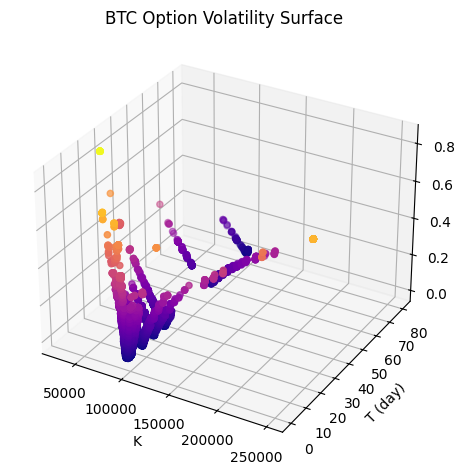

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from binance.client import Client
from scipy.stats import norm
from scipy.optimize import brentq
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Binance Ïä§Ìåü Í∞ÄÍ≤© Î∂ôÏù¥Îäî Ìï®Ïàò
def attach_binance_spot_prices(target_df, api_key, api_secret):
    client = Client(api_key, api_secret)
    start_time = target_df['timestamp'].min() - timedelta(minutes=5)
    end_time = target_df['timestamp'].max() + timedelta(minutes=5)

    klines = client.get_historical_klines("BTCUSDT", interval=Client.KLINE_INTERVAL_1MINUTE,
                                          start_str=start_time.strftime("%Y-%m-%d %H:%M:%S"),
                                          end_str=end_time.strftime("%Y-%m-%d %H:%M:%S"))

    spot_df = pd.DataFrame(klines, columns=[
        "timestamp", "open", "high", "low", "close", "volume", "close_time",
        "quote_asset_volume", "number_of_trades", "taker_buy_base",
        "taker_buy_quote", "ignore"
    ])
    spot_df['timestamp'] = pd.to_datetime(spot_df['timestamp'], unit='ms')
    spot_df['spot_price'] = spot_df['close'].astype(float)
    spot_df = spot_df[['timestamp', 'spot_price']]

    merged_df = pd.merge_asof(
        target_df.sort_values('timestamp'),
        spot_df.sort_values('timestamp'),
        on='timestamp',
        direction='backward'
    )

    return merged_df

# Step 2: Black-Scholes Í∞ÄÍ≤© Î∞è IV Í≥ÑÏÇ∞
def black_scholes_price(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == 'call':
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

def implied_volatility(price, S, K, T, r, option_type='call'):
    try:
        return brentq(lambda sigma: black_scholes_price(S, K, T, r, sigma, option_type) - price, 1e-6, 5.0)
    except:
        return np.nan

# Step 3: ÏòµÏÖò CSV Î≥ëÌï©
def load_and_merge_option_data(folder_path):
    all_dfs = []
    for file in os.listdir(folder_path):
        if file.endswith(".csv") and file.startswith("BTC-"):
            df = pd.read_csv(os.path.join(folder_path, file))
            df['timestamp'] = pd.to_datetime(df['timestamp'])
            df['expiration'] = pd.to_datetime(df['expiration'])
            all_dfs.append(df)
    return pd.concat(all_dfs, ignore_index=True)

# Step 4: Ï†ÑÏ≤¥ ÌååÏù¥ÌîÑÎùºÏù∏ Ïã§Ìñâ
def process_and_plot_vol_surface(folder_path, api_key, api_secret):
    df = load_and_merge_option_data(folder_path)
    df = attach_binance_spot_prices(df, api_key, api_secret)

    # ‚úÖ TÎ•º 'Ïùº Îã®ÏúÑ'Î°ú ÌëúÌòÑ
    df['T_days'] = (df['expiration'] - df['timestamp']).dt.total_seconds() / (60 * 60 * 24)

    # IV Í≥ÑÏÇ∞ÏùÑ ÏúÑÌï¥ÏÑ† Ïó¨Ï†ÑÌûà 'Ïó∞ Îã®ÏúÑ' T ÏÇ¨Ïö©
    df['T_years'] = df['T_days'] / 365

    r = 0.01  # Î¨¥ÏúÑÌóò Í∏àÎ¶¨

    df['IV'] = df.apply(lambda row: implied_volatility(
        price=row['price'],
        S=row['spot_price'],
        K=row['strike'],
        T=row['T_years'],
        r=r,
        option_type=row['option_type']
    ), axis=1)

    # Step 5: ÏãúÍ∞ÅÌôî (T_daysÎ•º YÏ∂ïÏúºÎ°ú)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    x = df['strike']
    y = df['T_days']
    z = df['IV']

    ax.scatter(x, y, z, c=z, cmap='plasma')
    ax.set_xlabel('K')
    ax.set_ylabel('T (day)')
    ax.set_zlabel('IV')
    ax.set_title('BTC Option Volatility Surface')
    plt.tight_layout()
    plt.show()


# üìå Ïó¨Í∏∞Ïóê Ïã§Ï†úÎ°ú Ïã§ÌñâÌïòÎ†§Î©¥ ÏïÑÎûò ÏΩîÎìúÎ•º ÏÇ¨Ïö© (ÌÇ§Îäî ÌôòÍ≤ΩÎ≥ÄÏàò ÎòêÎäî ÏßÅÏ†ë ÏûÖÎ†• ÌïÑÏöî)
process_and_plot_vol_surface(
    folder_path="./deribit_split",
    api_key="zKyYTZWpQC9FfWlaWvbTLkeNENIPt8bBFIwJsMvl2x7pdeC5DI7YEQv9JzJpEEcW",
    api_secret="lLCEiIcWuip8k529JgBAWXMZXHVHmABTIfRK62oPFjslRhuZcfNmx2IrqwEC0VMH"
)

